# Testing Random Network
## Parameters: net_size=100, degree=20, k=2, foget_rate=1/3 and for interface_dim=35

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
degree=20
netsize=1000
k=2
forget_rate=1/3
interface_dim=350

In [3]:
density=degree/netsize
r=np.random.uniform(0,1,(netsize,netsize))
r2=np.random.uniform(0,1,(netsize,netsize))
randomnetwork=np.zeros((netsize,netsize))
for row in range(netsize):
    for col in range(netsize):
        if r[row,col] < density:
            if r2[row,col] <1/3:
                randomnetwork[row,col]=-2/k
            else:
                randomnetwork[row,col]=1/k

In [4]:
#randomnetwork[0]

## One shock in period of time

In [5]:
interface=np.zeros(interface_dim)
for i in range(interface_dim):
    r=tf.random.uniform(shape=[],minval=0,maxval=1)
    interface[i]=r

In [6]:
#interface

In [7]:
time=10
#Initialized!
temp=np.zeros((time,netsize))

In [8]:
for i in range(interface_dim):
   temp[0,i]=interface[i]

#update fire states
for t in range(time):
    if t<time-1:
        for i in range(netsize):
            s= np.dot(temp[t],randomnetwork[i])*forget_rate
            
            
            if s>0:
                 temp[t+1,i]=s
            else:
                 temp[t+1,i]=0

In [9]:
from PIL import Image

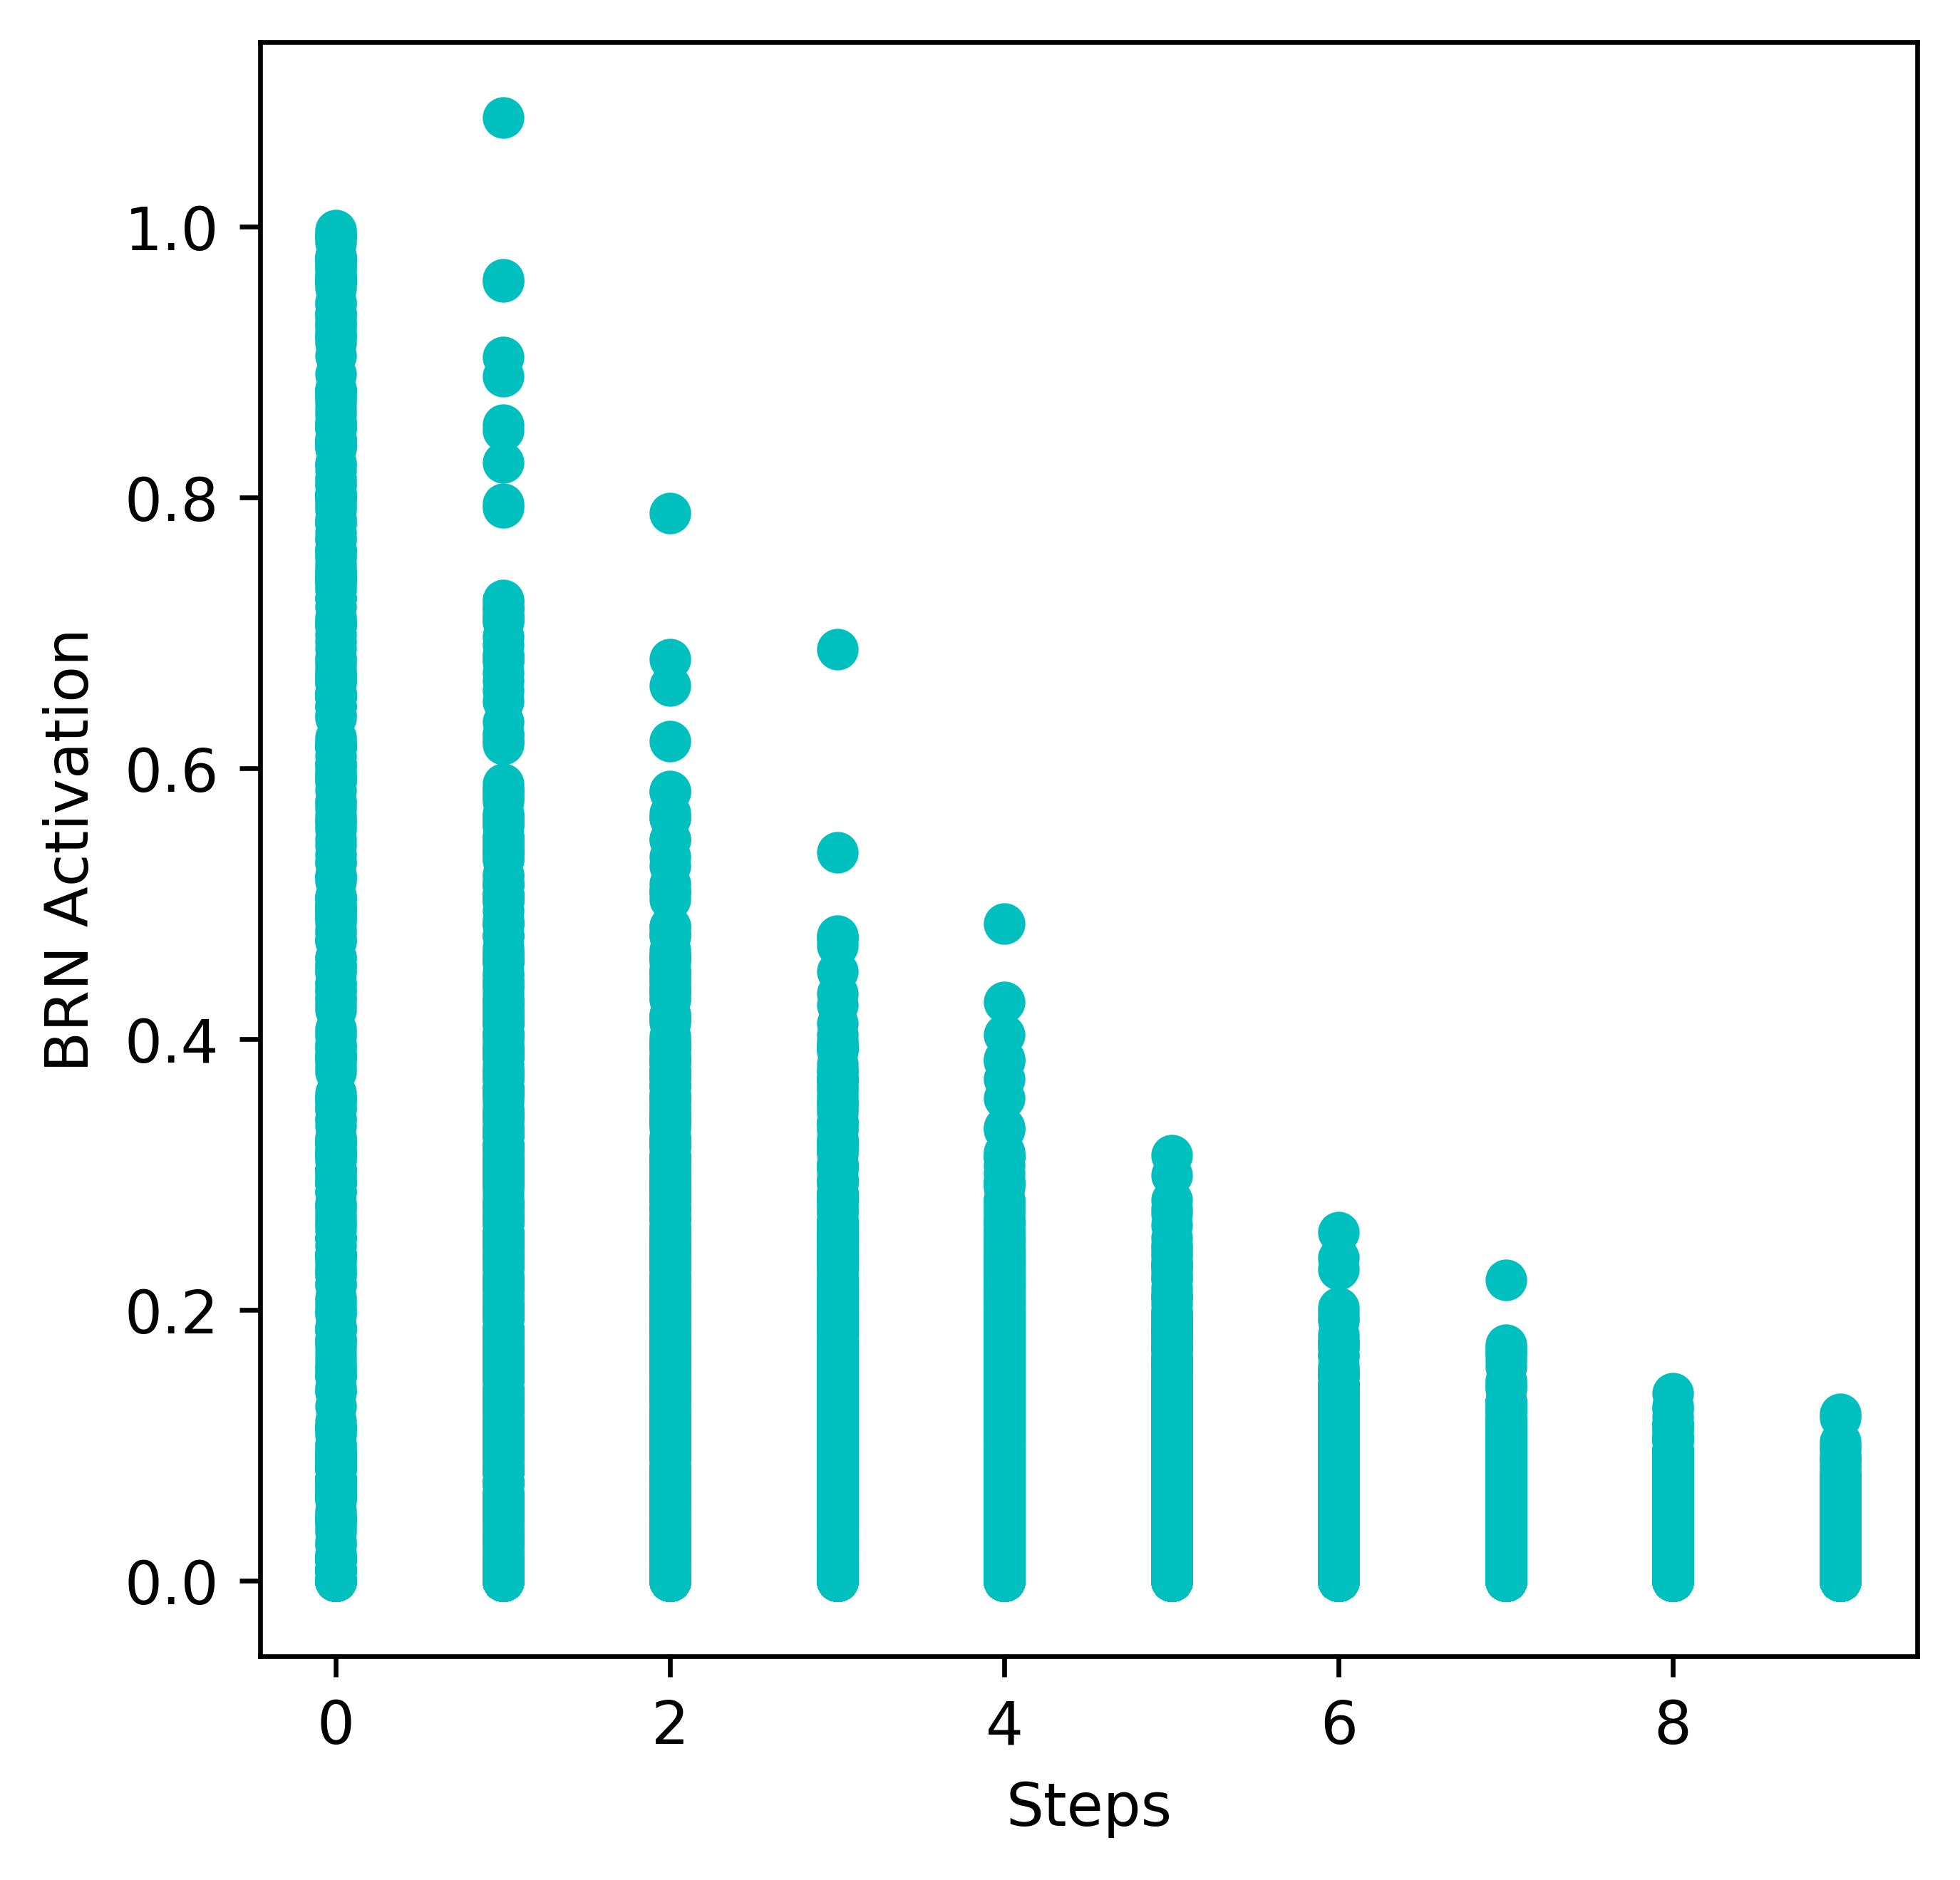

In [10]:
fig = plt.figure(figsize=(5,5), dpi=600) #for HQ Fig
y=np.zeros(netsize)
for t in range(time):
    plt.scatter(y,temp[t],c='c')
    y=y+1
plt.xlabel("Steps")
plt.ylabel("BRN Activation")
fig.savefig('RN1FIRE.png')   

In [11]:
for i in range(time):
    print(max(temp[i])*100)

99.77941513061523
108.06840062141418
78.84668674733902
68.82212156498872
48.55788514753918
31.445818865066194
25.754592047214743
22.219545296748905
13.843108926606032
12.313377753771729


## Stability in Long Period of Time and Multiple Shocks...

In [12]:
time=40
#Initialized!
temp=np.zeros((time,netsize))

In [13]:
for i in range(interface_dim):
   temp[0,i]=interface[i]

#update fire states

temp2=np.zeros(netsize)
for t in range(time):
    if t<time-1:
        interface=np.zeros(interface_dim)
        for i in range(interface_dim):
            r=tf.random.uniform(shape=[],minval=0,maxval=1)
            interface[i]=r
                
        for i in range(interface_dim):
            temp2[i]=temp[t,i]+interface[i]
            
        for i in range(netsize):
            s=np.dot(temp2,randomnetwork[i])*forget_rate 
            if s>0:
                temp[t+1,i]=s
            else:
                temp[t+1,i]=0

In [14]:
y=np.zeros(netsize)

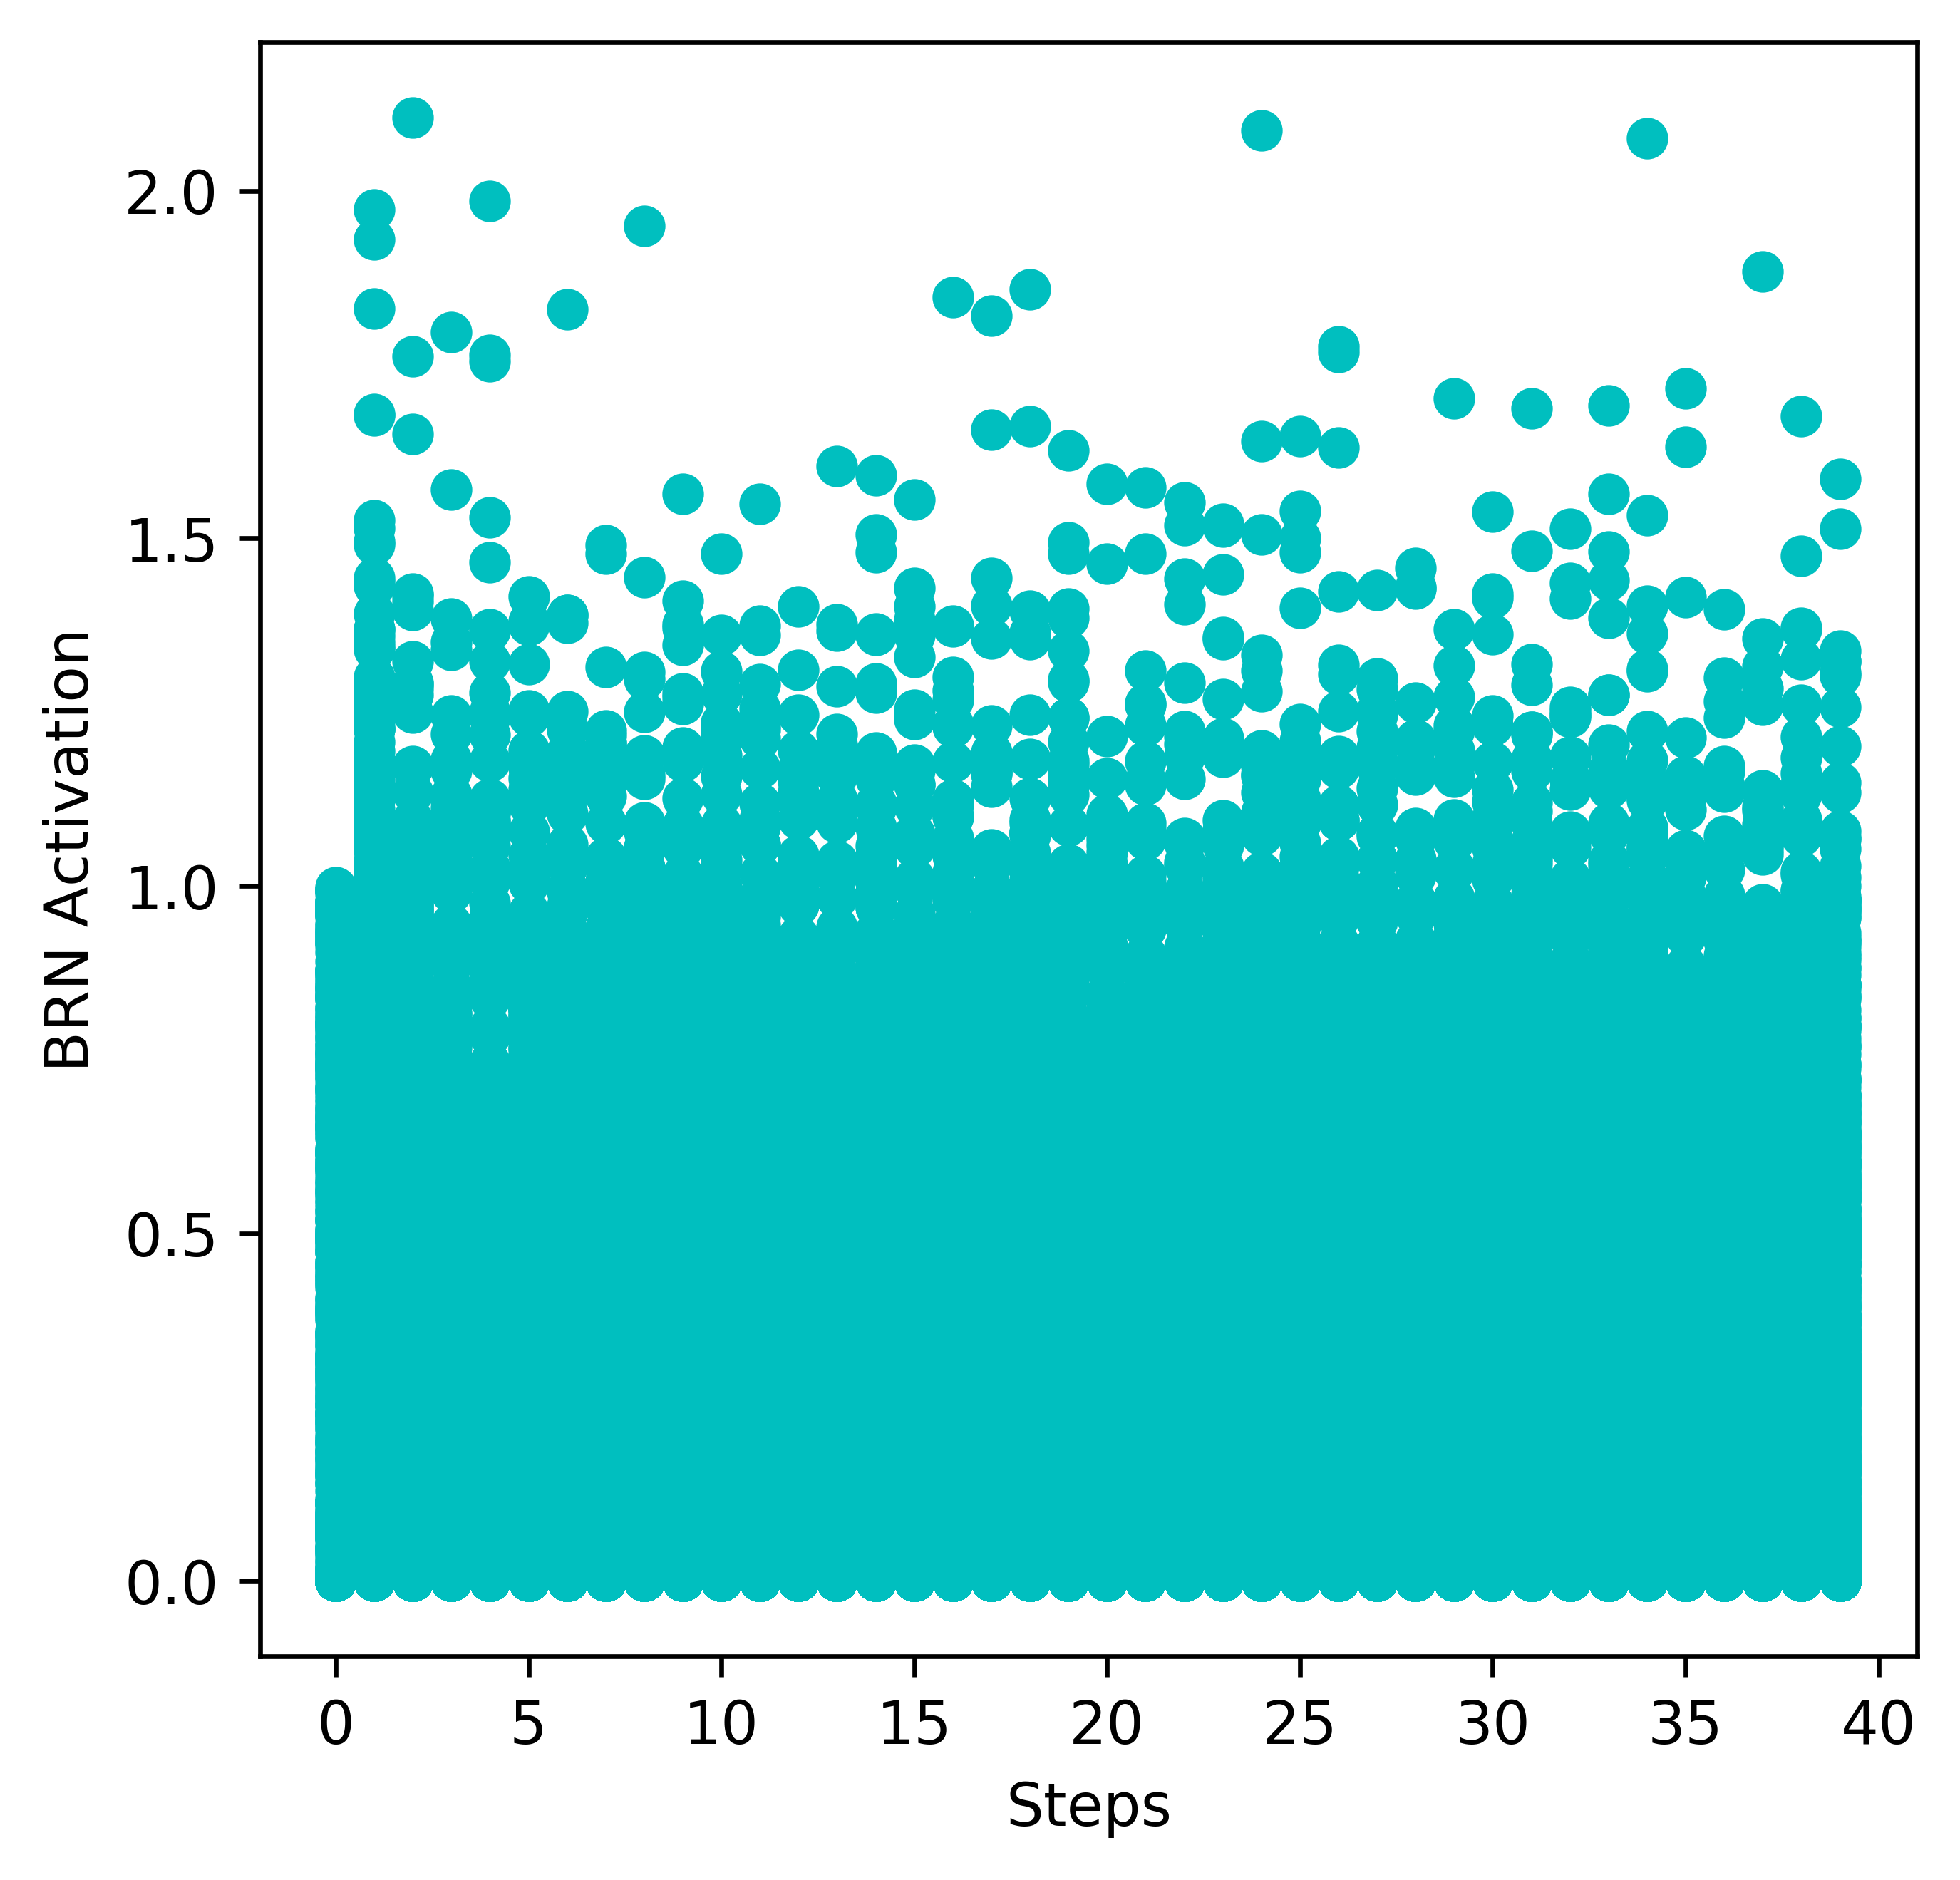

In [15]:
fig2 = plt.figure(figsize=(5,5), dpi=600)
for t in range(time):
    plt.scatter(y,temp[t],c='c')
    y=y+1
    
plt.xlabel("Steps")
plt.ylabel("BRN Activation")
fig2.savefig('RN2FIRE.png')